In [1]:
import numpy as np
from pymanopt.manifolds import Sphere

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from mpl_toolkits.mplot3d import Axes3D
import scipy.ndimage

import mala.utils as my
import mala.potentials
import mala.metropolis_hastings as vanilla_mh
import mala.MA_metropolis_hastings as mamh
import mala.icosehedron as ico

%matplotlib inline

%load_ext autoreload
%autoreload 2

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [2]:
H = mala.potentials.Spherical(ambient_dim=3,proper_dim=2)
face_graph,vertex_graph,face_dict = ico.generate_icosahedron()

In [3]:
from test_icosehedron import test_chart_maps,test_transitions

face_graph,vertex_graph,face_dict = ico.generate_icosahedron()

# tests generation of icosahedron face graph, transformations into/out
# of chart image
test_chart_maps()
test_transitions()

In [4]:
%matplotlib inline
T = 100
# note: our faces' circumcircle is about 1.15, so we want our step size
# to be small relative to that
step_size = 0.05

trajectory = mamh.ico_MAMH(H,T,step_size)

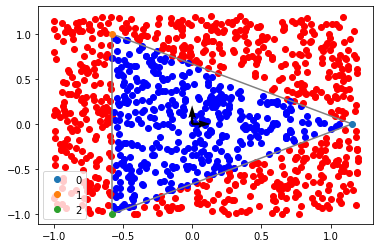

In [5]:
## De-bugging check_if_point_in_face

target_face= face_dict[list(face_graph.nodes())[0]]
plt.figure()

# plot triangle sides
transformed_face = target_face.chart_transform_face()
u,v,w = transformed_face.list_vert_coors()
for x,y in [[u,v],[v,w],[u,w]]:
    plt.plot([x[0],y[0]],[x[1],y[1]],color='grey')
# scatter and label points
for idx,x in enumerate([u,v,w]):
    plt.plot([x[0]],[x[1]],'o',label=idx)

# generate a whole bunch of random points at uniform
samples = 1000
data = np.random.uniform(low=-1.0, high=1.2, size=(samples,2))
for ii in range(samples):
    if np.all(ico.check_if_point_in_face(data[ii,:],target_face,in_chart_coors=True)):
        plot_color = 'b'
    else:
        plot_color='r'
    plt.scatter(data[ii,0],data[ii,1],color=plot_color)
    
centroid = transformed_face.ctd_coors[:2]
plt.quiver(centroid[0],centroid[1],transformed_face.basis_1[0],
           transformed_face.basis_1[1])
plt.quiver(centroid[0],centroid[1],transformed_face.basis_2[0],
           transformed_face.basis_2[1])
plt.legend()
plt.show()
    




In [6]:
for node in face_graph.nodes():
    print(face_graph.degree[node])

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


<IPython.core.display.Javascript object>


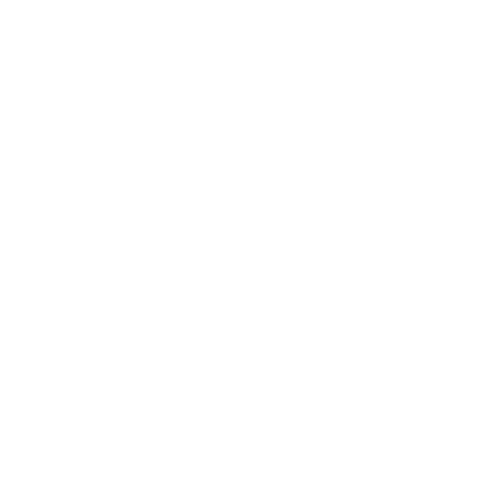

<IPython.core.display.Javascript object>


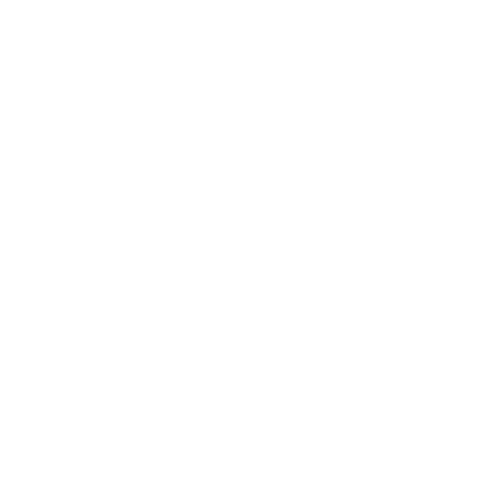

In [7]:
%matplotlib notebook
my.plot_on_icosahedron(H,trajectory)